In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#In order to allow to print all the 111 columns
pd.set_option('display.max_columns', 120)
import sys
#sys.path.insert(0,"/home/reda/xgboost/")

In [2]:
sigma = pd.read_hdf("./data/train.h5")

In [7]:
print(sigma.shape)
sigma.head(3)

(1710756, 111)


,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940


In [9]:
a=sigma.loc[:,~sigma.columns.isin(["id","timestamp"])]

In [16]:
a.ix[:,99:100].head(1)

,technical_36
0,0.775208


In [13]:
print("data dimension :{}".format(sigma.shape))
print("unique ids: {}".format(len(sigma["id"].unique())))
print("unique Timestamps: {}".format(len(sigma["timestamp"].unique())))

data dimension :(1710756, 111)
unique ids: 1424
unique Timestamps: 1813


In [20]:
sigma.columns.values

array(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2',
       'derived_3', 'derived_4', 'fundamental_0', 'fundamental_1',
       'fundamental_2', 'fundamental_3', 'fundamental_5', 'fundamental_6',
       'fundamental_7', 'fundamental_8', 'fundamental_9', 'fundamental_10',
       'fundamental_11', 'fundamental_12', 'fundamental_13',
       'fundamental_14', 'fundamental_15', 'fundamental_16',
       'fundamental_17', 'fundamental_18', 'fundamental_19',
       'fundamental_20', 'fundamental_21', 'fundamental_22',
       'fundamental_23', 'fundamental_24', 'fundamental_25',
       'fundamental_26', 'fundamental_27', 'fundamental_28',
       'fundamental_29', 'fundamental_30', 'fundamental_31',
       'fundamental_32', 'fundamental_33', 'fundamental_34',
       'fundamental_35', 'fundamental_36', 'fundamental_37',
       'fundamental_38', 'fundamental_39', 'fundamental_40',
       'fundamental_41', 'fundamental_42', 'fundamental_43',
       'fundamental_44', 'fundamental_45', 'fu

In [16]:
sigma["y"].describe()

count    1.710756e+06
mean     2.217509e-04
std      2.240643e-02
min     -8.609413e-02
25%     -9.561389e-03
50%     -1.570681e-04
75%      9.520990e-03
max      9.349781e-02
Name: y, dtype: float64

#### Only consider the first n timestamps for training

In [86]:
#sigma_500 = sigma[sigma["timestamp"].isin(sigma["timestamp"].unique()[:913])]
sigma_500 = sigma[sigma["timestamp"].isin( np.random.choice(sigma["timestamp"].unique(),100))]

In [87]:
print("data dimension :{}".format(sigma_500.shape))
print("unique ids: {}".format(len(sigma_500["id"].unique())))
print("unique Timestamps: {}".format(len(sigma_500["timestamp"].unique())))

data dimension :(90436, 111)
unique ids: 1405
unique Timestamps: 96


#### Consider the next m timestamps for testing

In [24]:
#considered_ids = sigma_500["id"].unique()
#sigma_test = sigma[sigma["timestamp"].isin(np.random.choice(sigma[sigma["timestamp"].isin(sigma_500["timestamp"].unique())]["timestamp"].unique(),100))]
sigma_test = sigma[sigma["timestamp"].isin(sigma["timestamp"].unique()[913:])]

In [25]:
print("data dimension :{}".format(sigma_test.shape))
print("unique ids: {}".format(len(sigma_test["id"].unique())))
print("unique Timestamps: {}".format(len(sigma_test["timestamp"].unique())))

data dimension :(897685, 111)
unique ids: 1297
unique Timestamps: 900


#### Compute simple statistics on the training set

In [4]:
statistics = pd.DataFrame(index =sigma_500.columns.values, columns=["Type","Missing values","mean","median","min","max"])

In [5]:
for column in sigma_500.columns.values:
    statistics.loc[column] = [sigma_500[column].dtypes,sum(sigma_500[column].isnull()),np.nanmean(sigma_500[column]),np.nanmedian(sigma_500[column]),np.min(sigma_500[column]),np.max(sigma_500[column]) ]

In [6]:
statistics["index"]=np.arange(0,len(statistics),1)

In [7]:
statistics["% of missing values"]=statistics["Missing values"]*100/len(sigma_500)

In [49]:
statistics.to_pickle("./statistics_500")

In [16]:
statistics.ix[:60,:]

,Type,Missing values,mean,median,min,max,index,% of missing values
id,int16,0,1090.59,1090,0,2156,0,0
timestamp,int16,0,258.69,264,0,499,1,0
derived_0,float32,24001,-15.932,-0.0161943,-20175,73.408,2,5.67208
derived_1,float32,28431,0.341251,0.00866857,-0.0711654,330.596,3,6.71901
derived_2,float32,106917,0.0551577,0.0322407,-3221.66,3551.35,4,25.2673
derived_3,float32,46350,-1.62877,-0.00341279,-34341.8,554.44,5,10.9537
derived_4,float32,108376,64.7681,-0.0182584,-18.364,67859.6,6,25.6121
fundamental_0,float32,9749,-0.00912063,-0.03154,-2.34496,1.37819,7,2.30395
fundamental_1,float32,186141,0.0360282,-0.0269432,-2.50307,29.2132,8,43.9901
fundamental_2,float32,95627,-0.273722,-0.073613,-1077.1,76.7711,9,22.5992


In [17]:
statistics.ix[60:,:]

,Type,Missing values,mean,median,min,max,index,% of missing values
fundamental_54,float32,104049,0.23794,0.124281,-0.277706,3.42222,60,24.5896
fundamental_55,float32,95627,-0.140321,-0.0434515,-222.442,95.5138,61,22.5992
fundamental_56,float32,95627,-0.0155662,-0.0322879,-50.4963,83.2056,62,22.5992
fundamental_57,float32,179673,0.0981009,-0.00706538,-0.282119,26.155,63,42.4615
fundamental_58,float32,48871,0.0221806,-0.00743064,-0.375184,2.18807,64,11.5495
fundamental_59,float32,6665,0.14955,-0.0343833,-0.148945,1.91835,65,1.57512
fundamental_60,float32,93657,0.185323,-0.0302334,-0.180669,22.3258,66,22.1337
fundamental_61,float32,184553,0.211504,0.0163239,-0.174729,42.2912,67,43.6148
fundamental_62,float32,32719,-0.0838416,-0.017438,-1.63316,1.6,68,7.73237
fundamental_63,float32,122128,0.153901,0.0618408,-0.323252,2.51433,69,28.8621


/home/reda/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


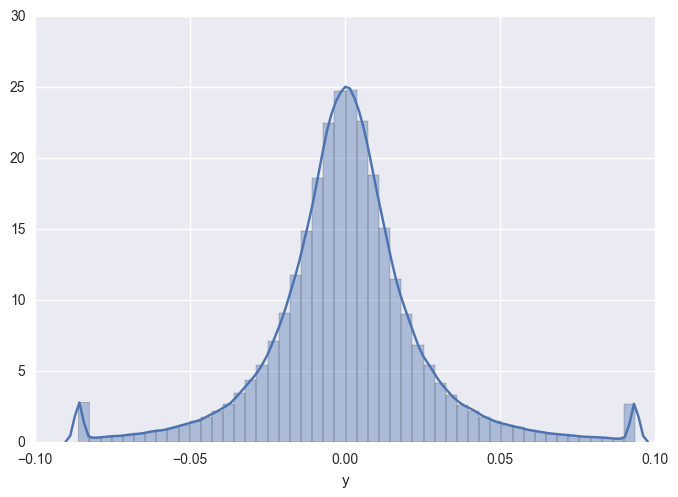

In [26]:
sns.distplot(sigma_500.y)

In [21]:
sigma_500.columns.values[np.arange(2,3,1)][0]

'derived_0'

In [142]:
def plot_features(seq): 
    feature_list=sigma_500.columns.values[seq]
    n=len(feature_list)
    plt.figure(1)
    f, axis = plt.subplots(n,figsize=(8,n*5))
    if n==1:
        sns.distplot(sigma_500[~sigma_500[feature_list[0]].isnull()][feature_list[0]],bins=40,ax=axis,kde=False)
    else:
        i=0
        for feature in feature_list:
            sns.distplot(sigma_500[~sigma_500[feature].isnull()][feature],bins=40,ax=axis[i],kde=False)
            i+=1

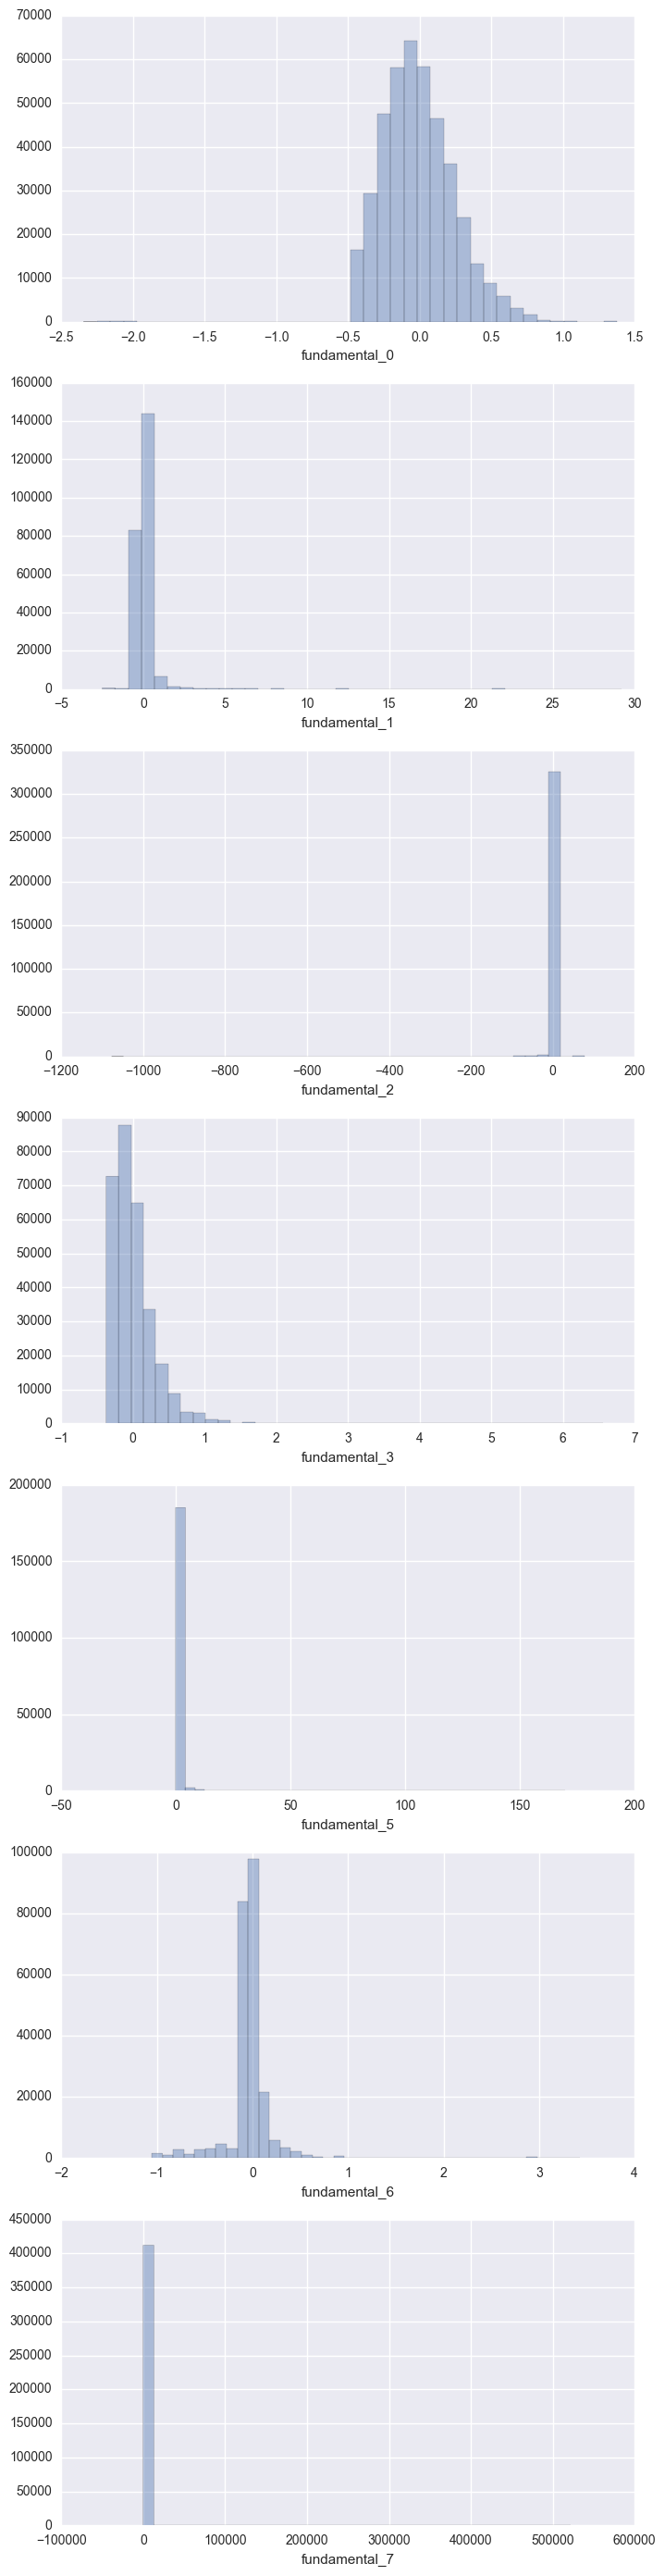

In [46]:
plot_features(np.arange(7,14,1))

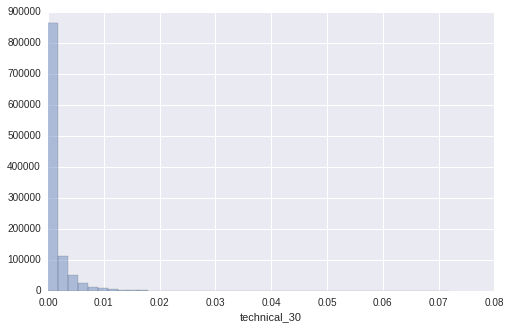

In [143]:
plot_features(np.arange(95,96,1))

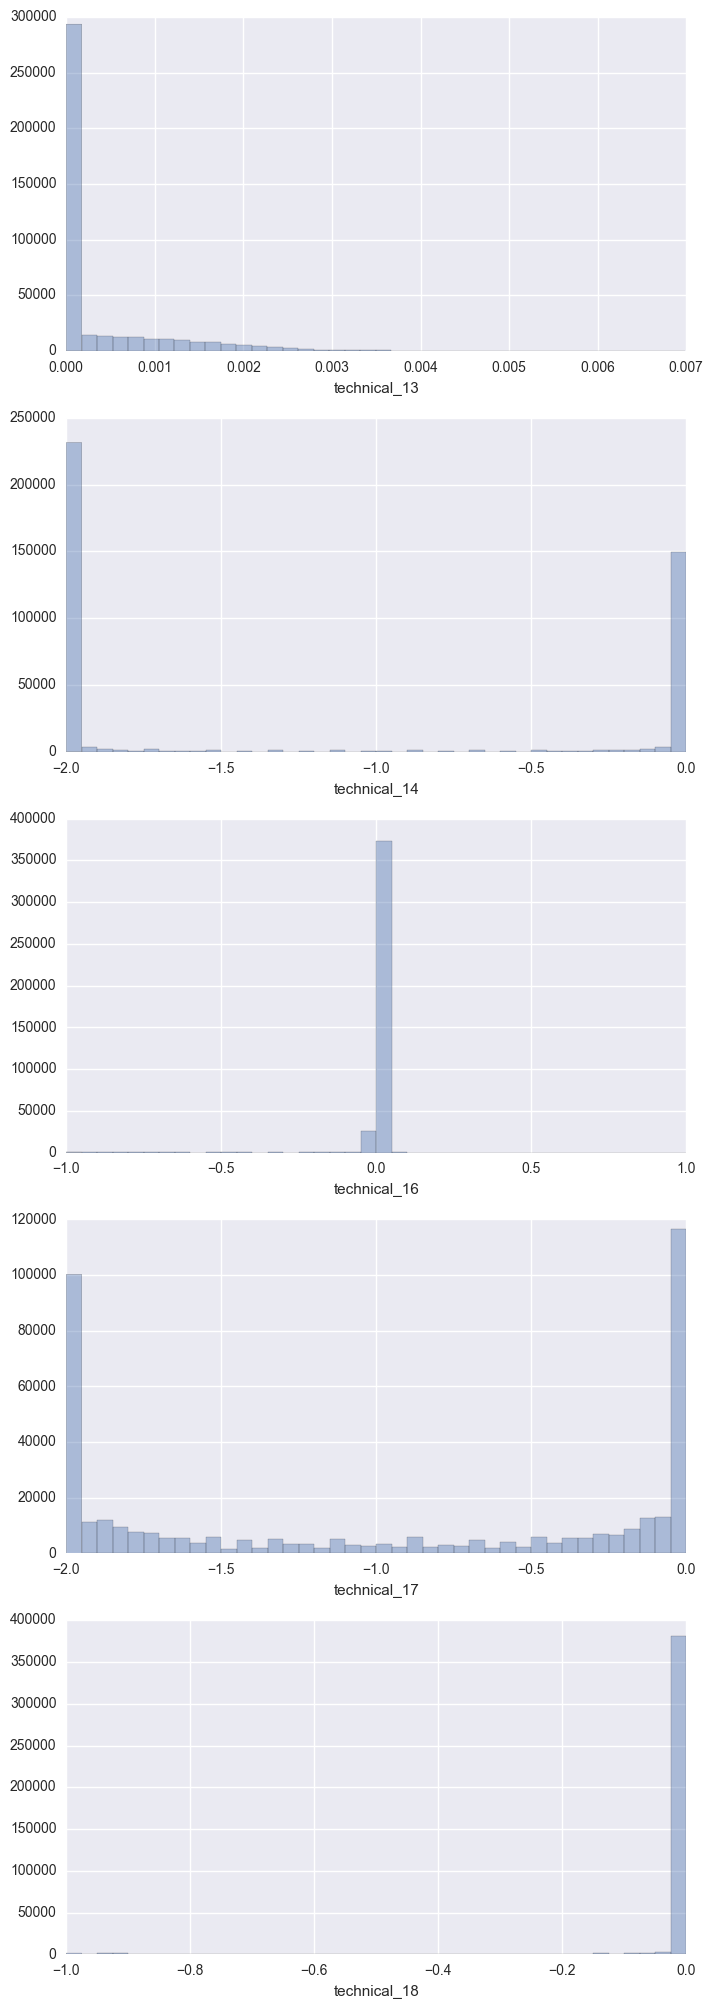

In [45]:
plot_features(np.arange(81,86,1))

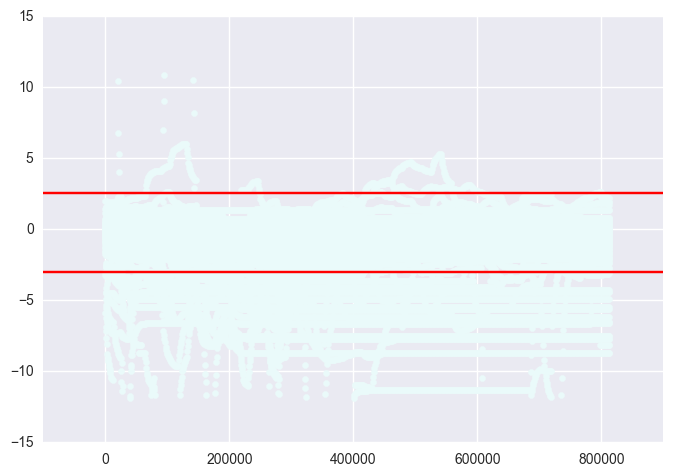

In [51]:
plt.figure(1)
plt.scatter(np.linspace(1,len(sigma_500["fundamental_11"]),len(sigma_500["fundamental_11"])),sigma_500["fundamental_11"])
std = np.std(sigma_500["fundamental_11"].values)
mean = np.mean(sigma_500["fundamental_11"].values)
#plt.plot((mean-3*std,0), (mean-3*std,90000), color='red')
#plt.plot((mean+3*std,0 ), (mean+3*std,90000), color='red')
plt.axhline(y=mean-3*std,color="red")
plt.axhline(y=mean+3*std,color="red")


In [48]:
len(sigma_500.loc[ (sigma_500["fundamental_11"]>mean-3*std) & (sigma_500["fundamental_11"]<mean+3*std),:]["fundamental_11"])/len(sigma_500["fundamental_11"])

1.0

In [58]:
sigma_test.loc[~( (sigma_test["fundamental_11"]>mean-3*std) & (sigma_test["fundamental_11"]<mean+3*std)) ,"fundamental_11"]=np.median(sigma_test.loc[ (sigma_test["fundamental_11"]>mean-3*std) & (sigma_test["fundamental_11"]<mean+3*std) ,"fundamental_11"])

/home/reda/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [63]:
for column in sigma_500.columns:
    sigma_500.loc[~( (sigma_500[column]>mean-3*std) & (sigma_500[column]<mean+3*std)) ,column]=np.median(sigma_500.loc[ (sigma_500[column]>mean-3*std) & (sigma_500[column]<mean+3*std) ,column])
for column in sigma_test.columns:
    sigma_test.loc[~( (sigma_test[column]>mean-3*std) & (sigma_test[column]<mean+3*std)) ,column]=np.median(sigma_test.loc[ (sigma_test[column]>mean-3*std) & (sigma_test[column]<mean+3*std) ,column])

/home/reda/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/reda/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


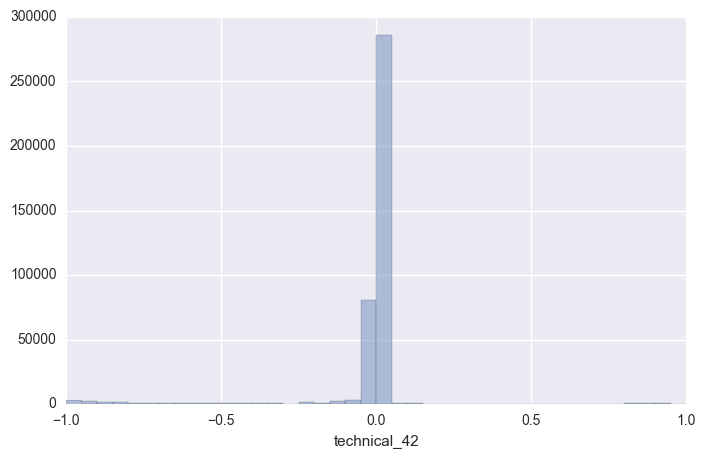

In [44]:
plot_features(np.arange(107,108,1))

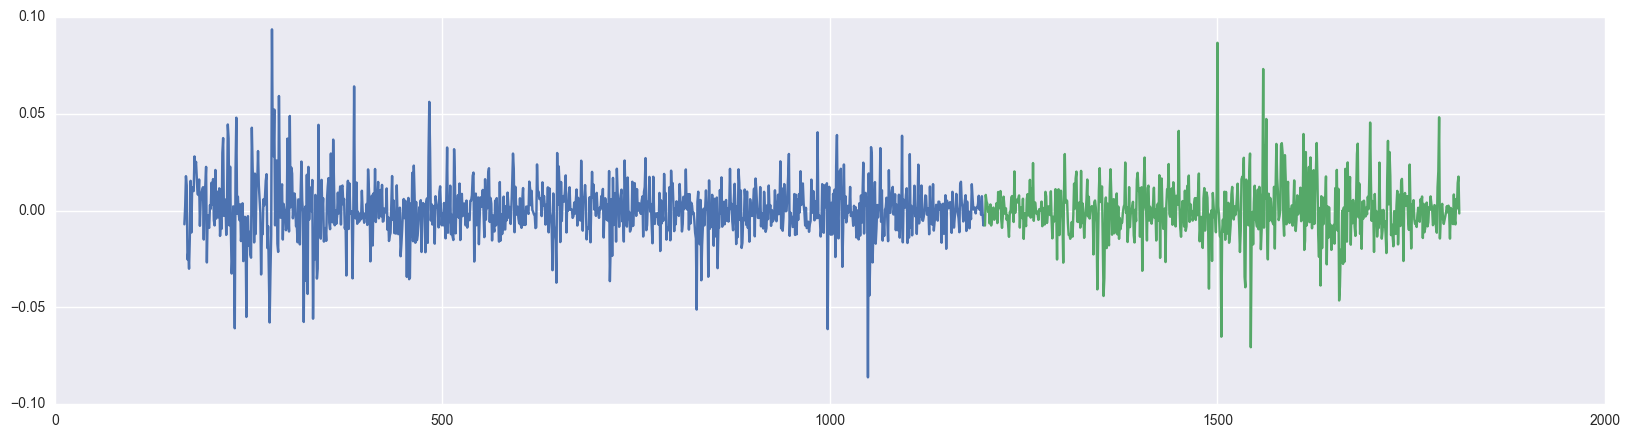

In [13]:
ident=0
plt.figure(2,figsize=(20,5))
plt.plot(sigma_500[sigma_500["id"] == ident]["timestamp"],sigma_500[sigma_500["id"] == ident]["y"])
plt.plot(sigma_test[sigma_test["id"] == ident]["timestamp"],sigma_test[sigma_test["id"] == ident]["y"])
#plt.plot(sigma[sigma["id"] == ident]["timestamp"],np.cumsum(sigma[sigma["id"] == ident]["timestamp"]) )

In [28]:
print(len(sigma[sigma["id"] == ident][sigma["y"]>=0]["y"]))
print(np.mean(sigma[sigma["id"] == ident][sigma["y"]>=0]["y"]))

print(len(sigma[sigma["id"] == ident][sigma["y"]<0]["y"]))
print(np.mean(sigma[sigma["id"] == ident][sigma["y"]<0]["y"]))


829
0.010211973451077938
817
-0.009945482015609741


/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [126]:
#pd.DataFrame({ "timestamp":sigma[sigma["id"]==ident]["timestamp"],"signal":sigma[sigma["id"]==ident]["y"]}).reset_index().to_csv("./data/time_series_id0.csv",sep=",")

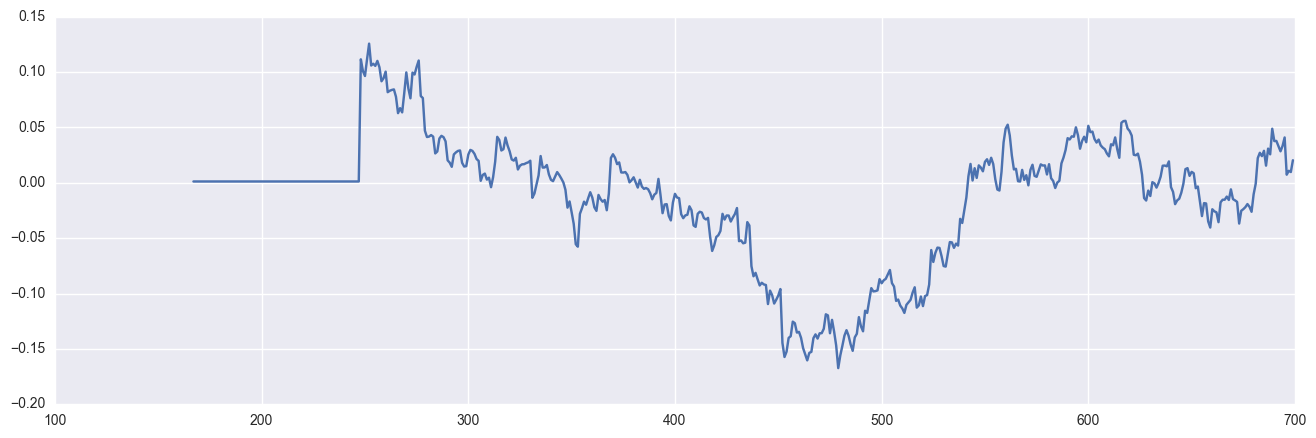

In [200]:
plt.figure(2,figsize=(16,5))
plt.plot(sigma_500[sigma_500["id"] == 0]["timestamp"],sigma_500[sigma_500["id"] == 0]["technical_3"])

#### Fill in missing values

##### Method 1: Use de median

In [26]:
for column in sigma_500.columns.values:
    sigma_500.loc[sigma_500[column].isnull(),column] = np.nanmedian(sigma_500.loc[~sigma_500[column].isnull(),column])

/home/reda/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
for column in sigma_test.columns.values:
    sigma_test.loc[sigma_test[column].isnull(),column] =  np.nanmedian(sigma_test.loc[~sigma_test[column].isnull(),column])

/home/reda/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Set a benchmark score

In [7]:
import time

In [28]:
train = sigma_500.drop(["id","timestamp"],axis=1)

#train.fillna(np.random.normal(0,0.01),inplace=True)
X = train.ix[:,train.columns != "y"].values
y = train.ix[:,train.columns == "y"].values


In [29]:
test = sigma_test.drop(["id","timestamp"],axis=1)
X_test = test.ix[:,test.columns != "y"]
y_test = test.ix[:,test.columns == "y"]

In [17]:
start_time = time.time()
model = GradientBoostingRegressor(verbose=1).fit(X,y)
print("--- %s seconds ---" % (time.time() - start_time))

/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           0.0007            8.42m
         2           0.0007            8.29m
         3           0.0007            8.15m
         4           0.0007            8.02m
         5           0.0007            7.92m
         6           0.0007            7.83m
         7           0.0007            7.82m
         8           0.0007            7.77m
         9           0.0007            7.75m
        10           0.0007            7.71m
        20           0.0007            6.89m
        30           0.0007            6.26m
        40           0.0007            5.51m
        50           0.0007            4.61m
        60           0.0007            3.65m
        70           0.0007            2.71m
        80           0.0007            1.79m
        90           0.0007           53.29s
       100           0.0007            0.00s
--- 532.8556206226349 seconds ---


In [24]:
model.score(X_test,y_test)

-0.0057000688026227486

##### Model with 10 estimators

In [25]:
model2=GradientBoostingRegressor(n_estimators=10).fit(X,y)

/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
model2.score(X_test,y_test)

-0.00038243778567337294

In [27]:
model3=GradientBoostingRegressor(n_estimators=10,max_depth=2,learning_rate=0.01).fit(X,y)

/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
model3.score(X_test,y_test)

-7.916908999616723e-05

In [92]:
params = {'n_estimators': 10, 'max_depth': 2,
          'learning_rate': 0.1, 'loss': 'ls','max_features':0.8}

In [94]:
model=GradientBoostingRegressor(**params,verbose=1).fit(X,y)

/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           0.0005            6.91s
         2           0.0005            6.25s
         3           0.0005            5.41s
         4           0.0005            4.56s
         5           0.0005            3.76s
         6           0.0005            2.99s
         7           0.0005            2.23s
         8           0.0005            1.49s
         9           0.0005            0.74s
        10           0.0005            0.00s


In [95]:
model.score(X_test,y_test)

0.0050658736458208953

In [90]:
mean_squared_error(y_test.values.ravel(),model.predict(X_test))

0.00054817797929866035

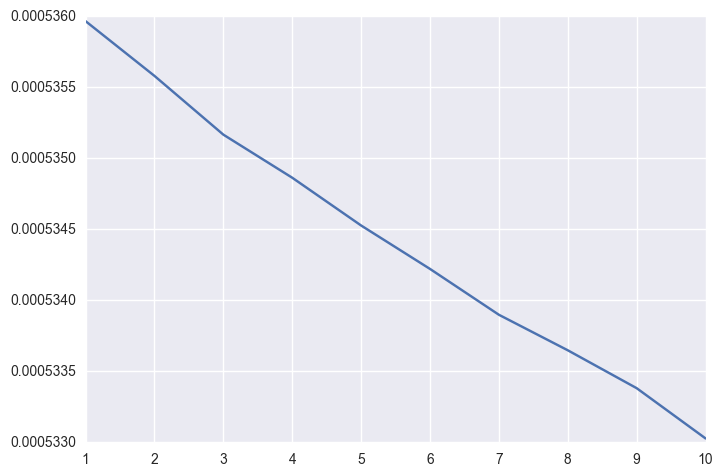

In [84]:
deviance_train = model.train_score_
plt.plot(np.linspace(1,len(deviance_train),len(deviance_train)),deviance_train)

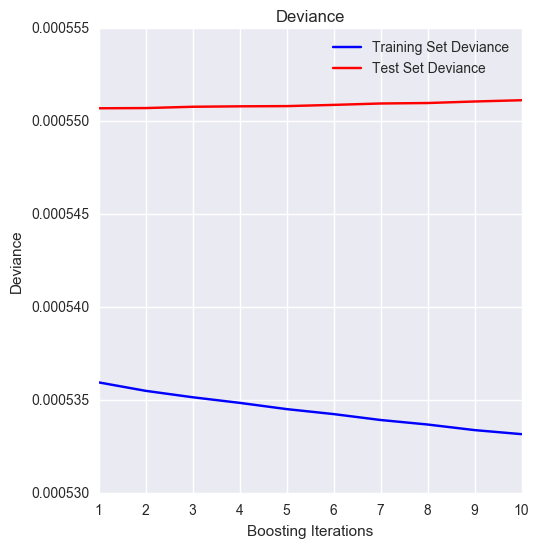

In [96]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test.values, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

#### Single trees

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
tree = DecisionTreeRegressor(max_depth=2).fit(X,y)

In [56]:
from sklearn.tree import export_graphviz

In [67]:
export_graphviz(tree,out_file='tree4.dot') 

In [12]:
len(tree.feature_importances_)

108

In [ ]:
train.drop(["y"],axis=1).columns[99]

'technical_36'

In [105]:
tree.tree_

In [68]:
tree.score(X_test,y_test)

0.00026735454621740212

In [17]:
np.zeros(2, dtype=np.float64)

array([ 0.,  0.])

In [18]:
np.linspace(1,2,2)

array([ 1.,  2.])

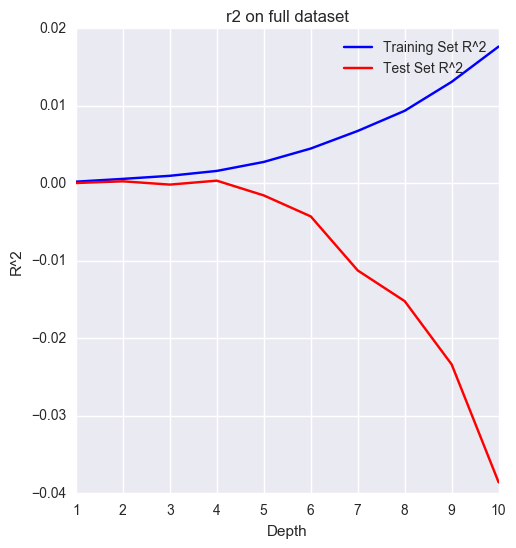

In [34]:
depth = np.linspace(1,10,10)
train_r2 = np.zeros(len(depth), dtype=np.float64)
test_r2 = np.zeros(len(depth), dtype=np.float64)

i=0
for n in depth:
    print("fitting tree with depth: {}".format(n))
    model = DecisionTreeRegressor(max_depth=n).fit(X,y)
    train_r2[i] = model.score(X,y)
    test_r2[i] = model.score(X_test,y_test)
    i+=1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('r2 on full dataset')
plt.plot(depth, train_r2, 'b-',
         label='Training Set R^2')
plt.plot(depth, test_r2, 'r-',
         label='Test Set R^2')
plt.legend(loc='upper right')
plt.xlabel('Depth')
plt.ylabel('R^2')

In [31]:
test_r2

array([  4.07067603e-05,   2.58425711e-04,  -1.61439699e-04,
         3.43936341e-04,  -1.55926959e-03,  -4.26728433e-03,
        -1.12404952e-02,  -1.52028219e-02,  -2.33687917e-02,
        -3.85850074e-02])

In [43]:
model3.staged_predict(X)

<generator object GradientBoostingRegressor.staged_predict at 0x7fe8ad5c5db0>

In [31]:
model3.estimators_[0].

array([ DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort='auto',
           random_state=<mtrand.RandomState object at 0x7fe9202e3120>,
           splitter='best')], dtype=object)

In [11]:
model4 = RandomForestRegressor(n_estimators=10,verbose=2,max_depth=6).fit(X,y)

/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


In [34]:
#max depth = 2
model4.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


-0.0007817112459527209

In [12]:
#max depth = 6
model4.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


-0.0031281249204093697

##### Ridge

In [100]:
ridge = Ridge(alpha=10,normalize=True).fit(X,y)

In [101]:
ridge.score(X_test,y_test)

-0.0028658233189535753

#### Random Forest

In [20]:
y.ravel().shape

(88277,)

In [36]:
def learning_curves(list_estimators):

    rsquared_train= np.zeros(len(list_estimators), dtype=np.float64)
    rsquared_test= np.zeros(len(list_estimators), dtype=np.float64)

    i=0
    for n_est in list_estimators:
        print("fitting a random forest model with {} trees".format(n_est))
        forest = RandomForestRegressor(n_estimators=n_est,max_depth=2,oob_score=True,n_jobs=-1).fit(X,y.ravel())
        rsquared_train[i]=forest.oob_score_
        rsquared_test[i]=forest.score(X_test,y_test.values.ravel())
        i+=1
    return rsquared_train, rsquared_test

In [23]:
list_estimators=[2,10,20,30]
train_score, test_score = learning_curves(list_estimators)

fitting a random forest model with 2 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 3 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 4 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 5 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 6 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 7 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 8 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 9 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 10 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


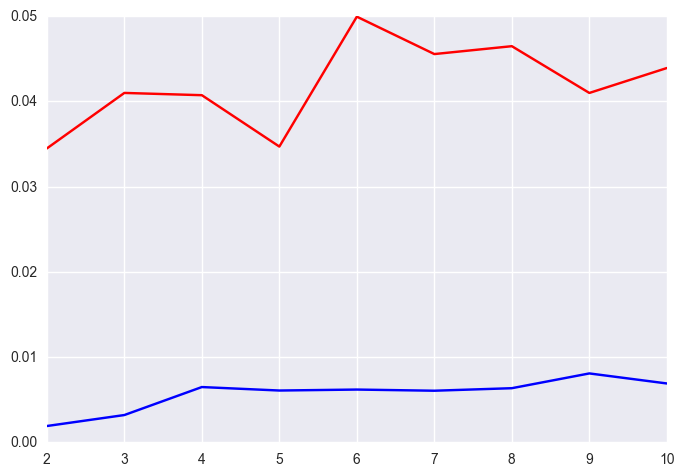

In [24]:
plt.plot(list_estimators,train_score,color="blue")
plt.plot(list_estimators,test_score,color="red")

fitting a random forest model with 2 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 10 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 20 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fitting a random forest model with 30 trees


/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


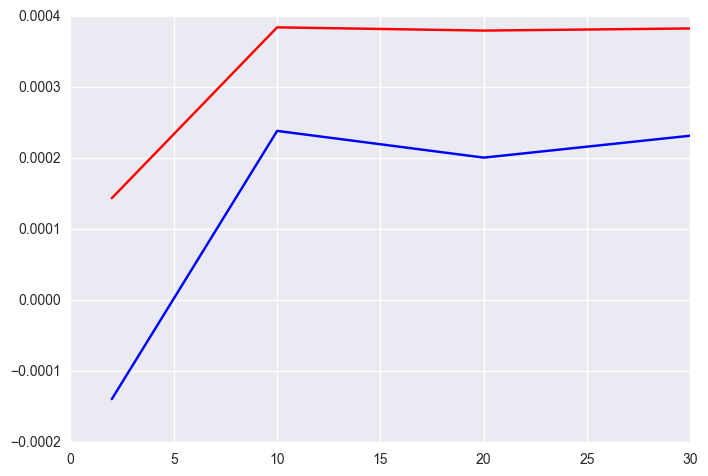

In [38]:
list_estimators=[2,10,20,30]
train_score, test_score = learning_curves(list_estimators)
plt.plot(list_estimators,train_score,color="blue")
plt.plot(list_estimators,test_score,color="red")

In [13]:
forest_big = RandomForestRegressor(n_estimators=6,max_depth=2,verbose=2).fit(X,y.ravel())

building tree 1 of 6


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s remaining:    0.0s


building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.0min finished


In [14]:
forest_big.score(X_test,y_test.values.ravel())

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


0.00037123814446771153

In [35]:
forest_big_2 = RandomForestRegressor(n_estimators=6,max_depth=,verbose=2).fit(X,y.ravel())
forest_big_2.score(X_test,y_test.values.ravel())

building tree 1 of 6


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.2s remaining:    0.0s


building tree 2 of 6
building tree 3 of 6
building tree 4 of 6
building tree 5 of 6
building tree 6 of 6


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished


-0.0011232227625206368

### Grid search with Gradient Boosting

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid={"max_depth":[2,6],
           "learning_rate": [0.1,0.05,0.01],
           "max_features":[1.0,0.5,0.1]}

In [ ]:
boosting_grid = GradientBoostingRegressor(n_estimators=10)

In [ ]:
boosting_cv = GridSearchCV(boosting_grid,param_grid).fit(X,y)

### PCA

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [104]:
pca = PCA(n_components=10, svd_solver="auto").fit(RobustScaler().fit_transform(X[:90000]) )

In [105]:
X_pca=pca.transform(X)
X_test_pca=pca.transform(X_test)

In [106]:
X_pca.shape

(813071, 10)

In [107]:
DecisionTreeRegressor(max_depth=10).fit(X,y).score(X_test,y_test)

-0.036283295942253879

In [109]:
DecisionTreeRegressor(max_depth=1).fit(X,y).score(X_test_pca,y_test)

-4.5251914306598806e-05

In [91]:
pca_test.explained_variance_ratio_

array([ 0.99999998])

In [73]:
pca_test.explained_variance_ratio_

array([ 1.])

In [64]:
pca_test.components_

array([[  8.92801117e-18,  -0.00000000e+00,  -1.14288573e-19,
          1.27219072e-18,  -2.83756194e-17,   4.60819246e-19,
         -6.46056812e-20,  -4.13349186e-20,  -1.18996127e-19,
          4.84086468e-19,  -1.11595718e-20,  -6.04286464e-16,
         -1.25065495e-19,   5.43941125e-19,  -3.48792808e-19,
          1.47962948e-19,  -1.39739569e-17,  -8.02180578e-20,
         -1.65798538e-19,  -2.00777960e-19,   1.67951521e-19,
          1.00000000e+00,   4.61742693e-19,  -3.13529295e-20,
          2.75230024e-17,   3.66428269e-19,  -3.47784973e-19,
         -5.75989024e-17,   9.26931238e-20,   1.31989902e-19,
         -2.26656607e-15,  -2.56155548e-18,  -1.36017742e-19,
         -6.48854939e-19,  -6.80605288e-20,  -1.62012470e-19,
         -4.51040290e-18,  -1.38265530e-19,  -4.07112280e-19,
         -1.64651256e-19,  -3.41125271e-16,  -2.94600523e-19,
         -1.47990237e-20,  -1.81627753e-19,  -2.47538726e-19,
         -1.47787268e-14,  -1.72203562e-14,  -8.29670018e-20,
        

### Consider only the fist ID

In [12]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score , log_loss, mean_squared_error
from sklearn.linear_model import Ridge

In [8]:
train_ids = sigma_500["id"].unique()
test_ids = sigma_test["id"].unique()
intersection_ids = [Id for Id in train_ids if Id in test_ids]

In [9]:
ident = 0
train_0 = sigma_500[sigma_500.id == ident].drop(["id","timestamp"],axis=1)
X_0 = train_0.ix[:,train_0.columns != "y"].values
y_0 = train_0.ix[:,train_0.columns == "y"].values

In [10]:
test_0 = sigma_test[sigma_test.id == ident].drop(["id"],axis=1).set_index("timestamp")

In [20]:
test_0

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
timestamp,,,,,,,,,,,,,,,,,,,,,
1200.0,-0.413891,-0.017160,-0.030690,0.022577,0.102081,-0.140492,0.520758,0.128257,-0.157536,-0.126987,...,-0.129440,-1.357967e-01,-1.107362e-16,-1.107362e-16,0.021577,0.047091,6.156252e-27,-2.516454e-06,0.014925,-0.007742
1201.0,-0.413890,-0.017161,-0.030692,0.023016,0.102079,-0.141914,0.520760,0.127863,-0.157536,-0.126987,...,-0.129998,-1.029146e-01,-8.392233e-17,-8.392233e-17,0.021398,0.058235,4.665566e-27,-1.907116e-06,0.012471,0.008064
1202.0,-0.413889,-0.017161,-0.030692,0.023194,0.102078,-0.142491,0.520760,0.127703,-0.157536,-0.126987,...,-0.130225,-8.959239e-02,-7.305863e-17,-7.305863e-17,0.021325,-0.020435,4.061612e-27,-1.660241e-06,0.016468,0.004656
1203.0,-0.413888,-0.017161,-0.030693,0.023484,0.102077,-0.143429,0.520762,0.127443,-0.157536,-0.126988,...,-0.130593,-6.789833e-02,-5.536809e-17,-5.536809e-17,0.021207,-0.032687,3.078126e-27,-1.258227e-06,0.016808,0.003493
1204.0,-0.407071,-0.018280,-0.031899,0.025458,0.101072,-0.149265,0.517961,0.127564,-0.157044,-0.127190,...,-0.097462,-5.910893e-02,-1.294494e-01,-1.294494e-01,0.021027,-0.017595,2.679664e-27,-1.095350e-06,0.017727,-0.000664
1205.0,-0.401136,-0.019254,-0.032949,0.027176,0.100197,-0.154346,0.515524,0.127670,-0.156615,-0.127366,...,-0.068620,-5.145731e-02,-2.421417e-01,-2.421417e-01,0.020871,-0.009788,2.332783e-27,-9.535579e-07,0.014682,0.001586
1206.0,-0.395969,-0.020102,-0.033863,0.028672,0.099436,-0.158769,0.513402,0.127762,-0.156242,-0.127520,...,-0.043512,-4.479619e-02,-3.402461e-01,-3.402461e-01,0.020735,-0.004704,2.030806e-27,-8.301204e-07,0.011148,-0.006670
1207.0,-0.391471,-0.020840,-0.034659,0.029974,0.098773,-0.162619,0.511554,0.127842,-0.155917,-0.127653,...,-0.021653,-3.899735e-02,-4.256508e-01,-4.256508e-01,0.020616,0.004648,1.767919e-27,-7.226618e-07,0.009085,0.003135
1208.0,-0.387556,-0.021482,-0.035352,0.031108,0.098196,-0.165971,0.509946,0.127911,-0.155634,-0.127770,...,-0.002625,-3.394917e-02,-5.000000e-01,-5.000000e-01,0.020513,0.024224,1.539063e-27,-6.291136e-07,0.015333,-0.007726


In [21]:
model_0 = GradientBoostingRegressor().fit(X_0,y_0)

/home/reda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
model_0.score(test_0.ix[:,test_0.columns != "y"],test_0.ix[:,test_0.columns == "y"] )

-0.75313121524452287

In [23]:
r2_score(test_0.ix[:,test_0.columns == "y"],[0]*len(test_0.ix[:,test_0.columns == "y"]) )

-6.5359165754008686e-05

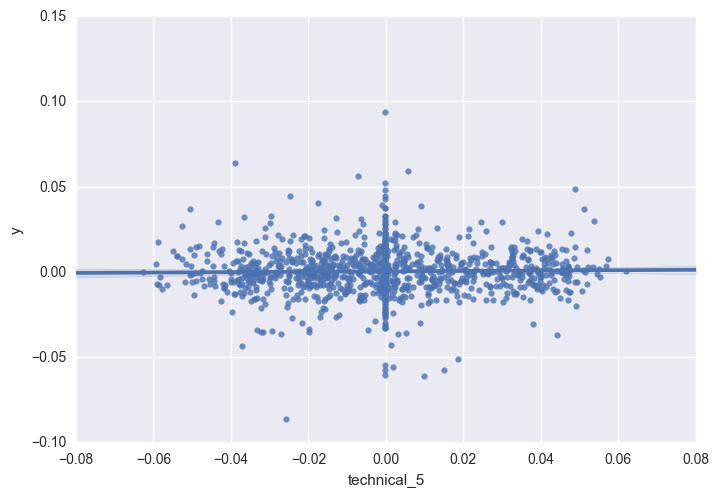

In [24]:
sns.regplot(sigma_500[sigma_500["id"] == ident]["technical_5"],sigma_500[sigma_500["id"] == ident]["y"],fit_reg=True)

In [25]:
from pylab import *

In [26]:
def plot_feature_importance(gboost,clean_dataset):
    feature_importance = pd.DataFrame({"features":clean_dataset.columns.values[:-1],"importance":gboost.feature_importances_})
    feature_importance = feature_importance.sort(columns="importance")
    values= feature_importance.importance[::-1][0:20]
    pos = np.arange(len(values))+1
    barh(pos,values, align='center')
    yticks(pos, feature_importance.features[::-1][0:20])

/home/reda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


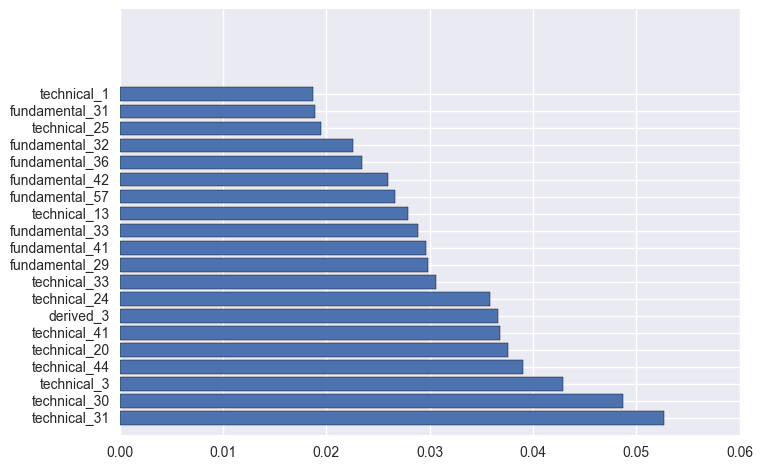

In [27]:
plot_feature_importance(model_0,train_0)

In [108]:
import sys
sys.path.insert(0,"/home/reda/pycast/pycast/")
from pycast.methods.exponentialsmoothing import HoltMethod
from pycast.common.timeseries import TimeSeries
from pycast.optimization import gridsearch
from pycast.errors import symmetricmeanabsolutepercentageerror as SMAPE

In [21]:
timestamp = sigma_500[sigma_500["id"] == ident]["timestamp"]
signal = sigma_500[sigma_500["id"] == ident]["y"]

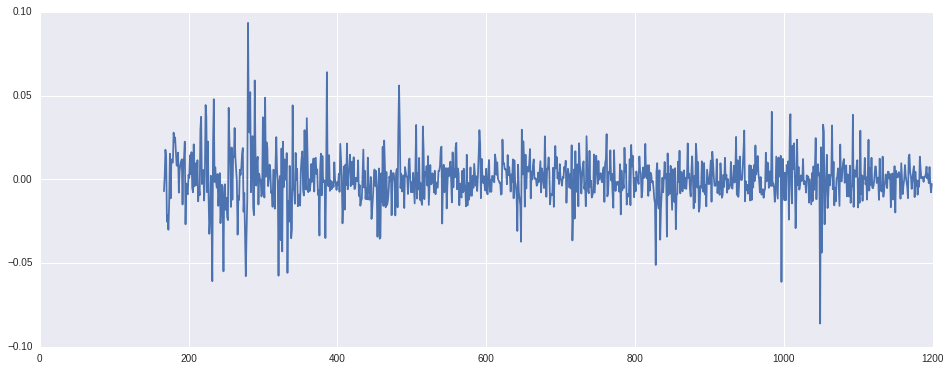

In [27]:
plt.figure(1,figsize=(16,6))
plt.plot(timestamp,signal)

In [127]:
time_series=TimeSeries.from_twodim_list(datalist=[[t,s] for t,s in zip(timestamp.values,signal.values)])

In [128]:
holt=HoltMethod(smoothingFactor=0.02,trendSmoothingFactor=0.01,valuesToForecast=20)
gridSearch = gridsearch.GridSearch(SMAPE.SymmetricMeanAbsolutePercentageError)
optimal_forecasting, error, optimal_params = gridSearch.optimize(time_series, [holt])

In [129]:
predicted = optimal_forecasting.execute(time_series)

In [130]:
predicted_list = predicted.to_twodim_list()

In [131]:
timestamp_p=[]
signal_p=[]
for l in predicted_list:
    timestamp_p.append(l[0])
    signal_p.append(l[1])

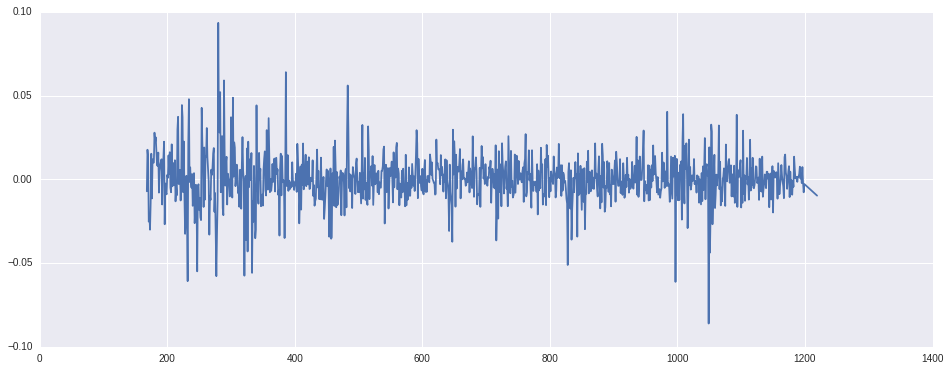

In [132]:
plt.figure(1,figsize=(16,6))
plt.plot(timestamp_p,signal_p)

In [136]:
len(timestamp.values)

1033

In [133]:
signal_p[1030::]

[-0.007715335581451654,
 -0.0027656438760459427,
 -0.0031119897328447167,
 -0.00345833558964349,
 -0.003804681446442264,
 -0.004151027303241038,
 -0.004497373160039812,
 -0.004843719016838586,
 -0.00519006487363736,
 -0.005536410730436134,
 -0.005882756587234908,
 -0.006229102444033682,
 -0.006575448300832455,
 -0.006921794157631228,
 -0.007268140014430002,
 -0.007614485871228776,
 -0.00796083172802755,
 -0.008307177584826323,
 -0.008653523441625097,
 -0.008999869298423871,
 -0.009346215155222645,
 -0.00969256101202142]

In [7]:
import numpy as np

In [27]:
a=np.chararray((18,3),unicode=True)

In [29]:
a[0]=['fundamental_56', 'fundamental_15', 'technical_43']

In [31]:
list(a[0])

['f', 'f', 't']

In [5]:
a=np

[4, 7]